# Import Dependencies

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics

# Dataset Preprocessing

In [2]:
# Import Dataset

df = pd.read_csv('Group_12_data_cleaned.csv') 
df.head()

,Unnamed: 0,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,A
1,1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,A
2,2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,A
3,3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,A
4,4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,F


In [3]:
# Check the statistics of dataset

df.describe()

,Unnamed: 0,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number
count,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,5216.250587,-0.038164,-0.057172,-0.009766,0.000115,0.204178,-0.004961,0.040236,-0.000634,0.002551
std,3011.965191,0.793469,0.480454,0.965513,0.999997,0.319982,0.968284,0.782209,0.995826,0.993220
min,0.000000,-3.498799,-2.426761,-3.210528,-5.440122,-1.078955,-4.128270,-4.876130,-4.247781,-4.238959
25%,2608.000000,-0.128929,-0.259834,0.064919,-0.527256,0.082961,-0.598658,-0.044076,-0.543914,-0.372457
50%,5216.000000,0.043885,-0.055704,0.214288,0.089437,0.261718,-0.058835,0.220177,0.108221,0.064084
75%,7824.500000,0.204355,0.203385,0.352988,0.643738,0.261718,0.564038,0.446679,0.648376,0.500624
max,10436.000000,4.969080,3.846334,5.491990,3.987152,1.066121,3.969075,3.995218,4.580832,3.244594


In [4]:
# Check data format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20867 entries, 0 to 20866
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              20867 non-null  int64  
 1   intercolumnar distance  20867 non-null  float64
 2   upper margin            20867 non-null  float64
 3   lower margin            20867 non-null  float64
 4   exploitation            20867 non-null  float64
 5   row number              20867 non-null  float64
 6   modular ratio           20867 non-null  float64
 7   interlinear spacing     20867 non-null  float64
 8   weight                  20867 non-null  float64
 9   peak number             20867 non-null  float64
 10  monk                    20867 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.8+ MB


In [5]:
# Drop the first index column

df = df.drop(columns=['Unnamed: 0'])
df.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,A
3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,F


In [6]:
# Check class distribution for monk

df['monk'].value_counts()

A    8572
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: monk, dtype: int64

In [7]:
# Categorize monk variable to numerical categorical values

df['monk'].replace(['A', 'F','E','I','X','H','G','D','Y','C','W','B'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)
df.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,monk
0,0.266074,-0.165620,0.320980,0.483299,0.000000,0.273364,0.371178,0.929823,0.251173,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0
3,0.031541,0.297600,-3.210528,-0.583590,0.000000,-0.307984,0.710932,1.051693,0.594169,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,1


# Grid Search (finding optimal hyperparameters for Random Forest)

In [8]:
# Split data to features and labels

X = df.drop(columns=['monk'])
y = df['monk']

In [9]:
# Split data to training and testing sets

x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [10]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988384 using {'max_features': 'log2', 'n_estimators': 1000}
0.974120 (0.004796) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.986855 (0.002256) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.988384 (0.001711) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.976357 (0.003408) with: {'max_features': 'log2', 'n_estimators': 10}
0.987631 (0.002135) with: {'max_features': 'log2', 'n_estimators': 100}
0.988384 (0.001950) with: {'max_features': 'log2', 'n_estimators': 1000}


# Random Forest Model (with optimal hyperparameters)

In [11]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 1000, max_features = 'log2')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(x_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(x_test)


rf_clr = classification_report(y_test, y_pred)
print(rf_clr)

rf_clr_2 = classification_report(y_test, y_pred, output_dict = True)
%store rf_clr_2

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2587
           1       1.00      0.99      0.99      1164
           2       0.99      0.99      0.99       685
           3       1.00      0.98      0.99       474
           4       0.98      0.97      0.98       296
           5       0.99      0.99      0.99       309
           6       1.00      1.00      1.00       276
           7       1.00      0.99      1.00       217
           8       1.00      0.97      0.98       158
           9       0.98      0.95      0.96        56
          10       1.00      0.97      0.99        34
          11       1.00      0.80      0.89         5

    accuracy                           0.99      6261
   macro avg       0.99      0.97      0.98      6261
weighted avg       0.99      0.99      0.99      6261

Stored 'rf_clr_2' (dict)


# Plot Confusion Matrix

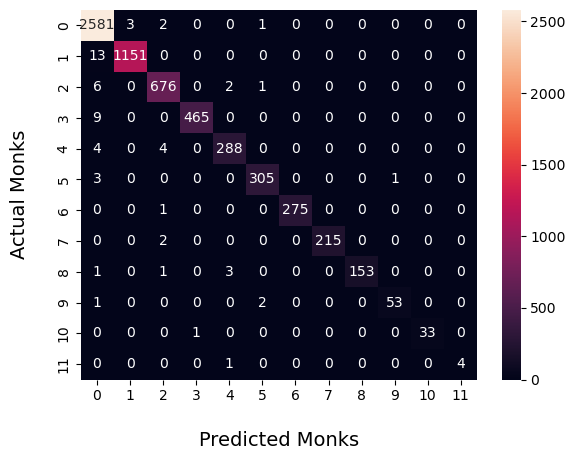

In [12]:
# Plot confusion matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', )

# set x and y label
ax.set_xlabel("Predicted Monks", fontsize=14, labelpad=20)
ax.set_ylabel("Actual Monks", fontsize=14, labelpad=20)
plt.savefig('rf_cm.png')